## Instructional Materials

some notes of things to discuss
* What is a "notebook" and why Python and Jupyter
* Introduce the notebook format as a way of making a "computational narrative" that mixes code, data, and visualizations. 
* There are many ways to engage with data computationally. 
    * You could use excel 
    * you can use many programming languages. We are using Python, a popular language for doing data science.
* Data centric computing, focused on insight rather than building software.
* 


**Outline**

- Motivation: Engage and use data computationally.
- There are many ways to use data with computation.
    - Microsoft Excel
- We are *programming for insight*, which is different from programming to create software.
    - code that will only run once
- We are going to use the Python programming language, a popular programming language for working with data.
- Combined with Jupyter Notebooks to create a computational narrative. Provides a record of our computation. Show our work.
-



### Reminder: What Is *Open Civic Data*

> NOTE: Not sure where this fits here, if it belongs in 5.1, or if it should be removed entirely. 

Remember from [Module 1.1: Introduction to Open Civic Data](https://civic-switchboard.gitbook.io/education-series/segment-1-introducing-civic-data/module-1.1-introduction-to-open-civic-data), Open Civic Data has the following characteristics:

* Freely available
* Machine-readable format
* Data about communities
* Collected by government, non-profits, civic-institutions, and community based organizations
* Not from private corporations

In this module we will explore three open civic datsets
* Carnegie Library of Pittsburgh Public Wifi
* Carnegie Library Locations
* Neighborhoods of Pittsburgh

## Dive into the CLP Public Wifi Dataset

> NOTE: I think this content could be used in Module 5.1

You can [visit the CLP Public Wifi](https://data.wprdc.org/dataset/clp-public-wifi) data on the Western Pennsylvania Regional Data Center (WPRDC), a *data intermediary* that publishes data from organizations in Western Pennsylvania.

Screenshot?

The main page for this dataset includes an interactive data visualization that shows the usage of wireless internet over time for each CLP location.

This visualization is derived from the raw data, but doesn't represent the data itself. We want to see the underlying data so we visit the [CLP Public Wifi Data Table page](https://data.wprdc.org/dataset/clp-public-wifi/resource/20843d56-506f-44b1-83df-5b16ee865783?view_id=251a99da-b3b5-4cdd-a64c-716dcf80275d), which shows the underlying tabular data.

## Exploring at the CLP Public Wifi Data

> Note: This content might be a better fit for Module 5.1

The CLP Public Wifi Data contains a ton of information about the usage of the public wireless usage at each of the Carnegie Library of Pittsburgh Locations.

*What does each row represent?*

One of the first things to consider when looking at a tabular dataset is to figure out what each row represents. That is, what pieces of information are unique for each row. This process starts by looking at what data is contained within each column and consider what those data points are unique or shared across rows. The Public Wifi data has 7 columns.

Each row represents a measurement of Public Wifi Usage, but its important to consider the *granularity* of these measurements. With this dataset there are several dimensions to consider, one is spatial and the other is temporal. How do we know this? We need to look at each column.


Columns:

- `CLPID` - An identifier code for each library location
- `Name` - The name of the library location
- `Year` - The year of measurement.
- `Month` - The month of the measurement
- `WifiSessions` - The total number of wireless access session.
- `WifiMinutes` - The total number of wireless minutes 

If we look at the 6 columns, we can see there are broadly three groups of information contained in the data. The first group is information about the library location (`CLPID` and `Name`), these columns specify the *geographic* granularity of the data. Second, there is information about time, specifically the `Month` and `Year` columns. These columns specify the *temporal* granularity of the data. Finally, there are the `WifiSession` and `WifiMinutes` columns, which measure the public Wifi usage.

If we look at the data values, the various columns, and how data are distributed across the columns we can infer what exactly each row represents: The total number of Wifi session and Wifi usage minutes on a monthly basis for each library location. 

Once we have a better understanding of the data and the granularity, then we can create some data centric questions:

* What are the total usages across library locations?
* What are the total yearly usage across library locations?
* What months are the most popular for wifi usage? Per location?
* Is there seasonal variation of wifi usage?
* Is wifi usage increasing year by year?

## Downloading the CLP Public Wifi Data

As discussed in [Module 3.5: File Formats for Open Civic Data](https://civic-switchboard.gitbook.io/education-series/segment-3-preparing-libraries-for-sharing-their-data/module-3.5-file-formats-for-open-civic-data), it is important for the data to be downloadable in an open, machine-readable format. The WPRDC provides the CLP Public Wifi data a variety of file formats.
* CSV - Comma Separated Values
* TSV - Tab Separated Values
* JSON - JavaScript Object Notation
* XML - eXtensible Markup Language

In each of these different files the data is the same, but the way it is structured is different. CSV is the most common format for saving tabular data as a file.

If you click and download the CLP Public Wifi as CSV you should note, the default filename is a very confusing string of numbers and letters, `20843d56-506f-44b1-83df-5b16ee865783.csv` This is an automatically generated filename by the WPRDC database, but we are going to rename the file `clp-public-wifi.csv` to make it easier to use.

The data file has already been downloaded and placed next to the notebook 


### Loading the Data

When we download the CLP Public Wifi data to our local computer, this gives us the ability to open and work with the dataset in whatever applications that are installed in our computer. Often the default application for working with tabular data in CSV files is Microsoft Excel. In our case, we will be using the Python programming language to open and manipulate the data file.

Loading Pandas is like opening the Excel application on our computer.

In [2]:
# load the Python libraries for working with data
import pandas

Now we can use the pandas `read_csv` function to load the data from our hard drive into memory so it can be manipulated with Python code. When we load the data in Python we need to assign the data to a variable, in this case we use a variable called `wifi_data`.

If we were using Excel, this would be like opening the CSV file.

In [3]:
# read the csv and save the data in a variable called wifi_data
wifi_data = pandas.read_csv("clp-public-wifi.csv")

It worked! But we don't see anything!? Working with data in Python is a bit different then using a graphical interface like Excel. With Python all of our interactions are text based commands rather than clicking with the mouse. So if we want to see the data we need to tell Python we want to look at it.

Using the `head` function we can tell Python to display the top or "head" of the tabular dataset. The default is five rows.

In [5]:
# display the first 5 rows of the data
wifi_data.head()

,CLPID,Name,Year,Month,WifiSessions,WifiMinutes
0,CLP01,ALLEGHENY LIBRARY,2016,1,1037,148513
1,CLP01,ALLEGHENY LIBRARY,2016,2,1064,150948
2,CLP01,ALLEGHENY LIBRARY,2016,3,949,129484
3,CLP01,ALLEGHENY LIBRARY,2016,4,934,136196
4,CLP01,ALLEGHENY LIBRARY,2016,5,1018,135793


Usually, you don't want to display every row in a dataset because many datasets are so large they will overflow your screen! If we want to get a sense of the size of our dataset, we can use the `len()` function to determine the "length" (number of rows) in our data.

In [4]:
# return the number of rows in the data
len(wifi_data)

532

This output is simply a number and fortunately this matches up with what the data looked like when we looked at it on the [WPRDC website](https://data.wprdc.org/dataset/clp-public-wifi), 532 rows.

### Answering Data Driven Questions

Now that the data has been loaded into Python with Pandas, we are able to perform calculations to learn more about the data. Even with this dataset we can begin to learn a bit about wifi usage at the Carnegie Libraries of Pittsburgh. 

#### Total Wifi Minutes

For example, what is the total usage of wifi minutes at all CLP locations? To answer this question, we can add together all of the values in the `WifiMinutes` column in the data. This *sum* will represent the total number of minutes the wifi has been used at all CLP locations over the period of time represented by the dataset.

In [15]:
# compute the sum of the WifiMinutes column
wifi_data["WifiMinutes"].sum()

114514102

That's a lot of minutes! How many hours, days, years would that be? To answer this question, we must take that total number of minutes and perform a series of mathematical calculations. First, we need to take that sum total we previously calculated and save it to a variable. This will allow us to manipulate the value in subsequent calculations.

In [6]:
# compute total minutes and save in a variable
total_minutes = wifi_data["WifiMinutes"].sum()

Now we can perform some math to determine the total number of hours by dividing the total number of minutes by 60.

In [7]:
# compute the number of hours 
total_hours = total_minutes / 60
print("Total Hours:", total_hours)

Total Hours: 1908568.3666666667


That is a lot of hours! This is still a hard to understand number. Let's perform another mathematical calculation and determine the number of days from the total hours.

In [8]:
# compute the number of days
total_days = total_hours / 24
print("Total Days:", total_days)

Total Days: 79523.68194444444


Ok, now we are getting something somewhat comprehensible, but 79 thousand days is still just a lot of days. Perhaps we can convert the number of days into number of years.

In [9]:
# compute the number of years
total_years = total_days / 365
print("Total Years:", total_years)

Total Years: 217.873101217656


WOW! That is a lot of years! Over 200!? That seems like a lot. Remember, this number represents the cumulative amount of time people have been using the internet at all of the CLP library locations. What would be helpful is to have some context about how many were using the wireless internet.

However, we do have the number of Wifi Session, that is the number of people connecting to the wireless internet. We can use this as a proxy for people counts.

In [22]:
# compute the total number of wifi sessions by calculating the sum of the WifiSessions column
wifi_data["WifiSessions"].sum()

863530

So this number tells us how many times people connected to the internet. With this information we could get a sense of how long people are using the internet every time they connect.

In [23]:
# compute the total sessions and save to a variable
total_sessions = wifi_data["WifiSessions"].sum()

# compute the average number of minutes for teach session
total_minutes / total_sessions

132.61160816647944

So this means, on average, people used the wireless internet for about two hours. That seems like a reasonable number.

### Recreate the WPRDC chart

The homepage for the CLP Public Wifi Data has a chart that shows the Wifi usage for 2017. We can recreate that chart (and even make it better) using Python!

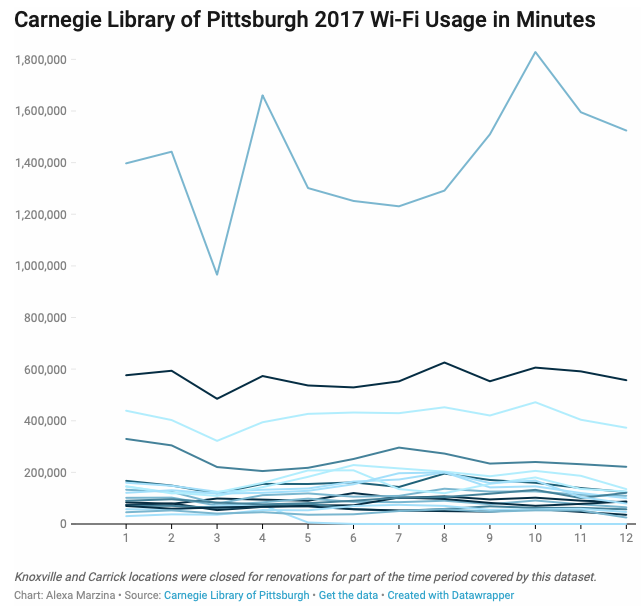

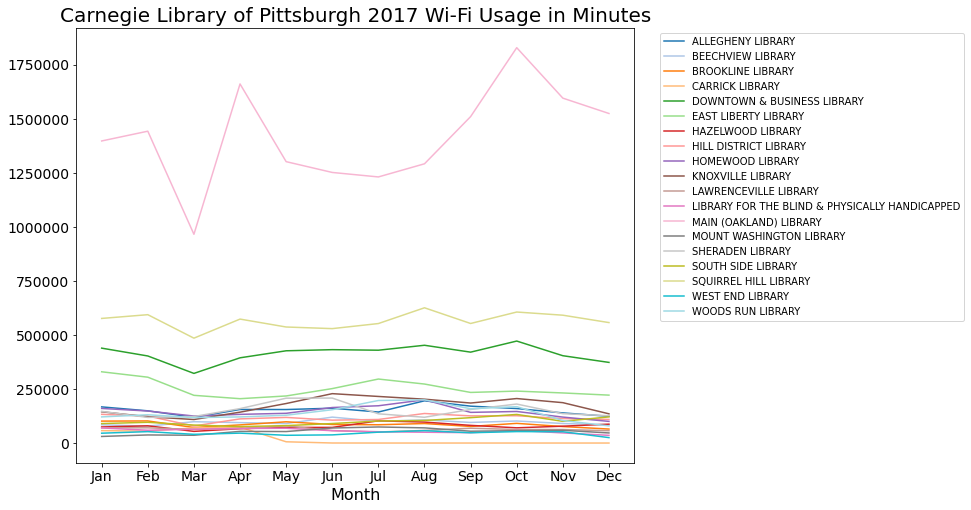

In [4]:
year = 2017

# Select just the 2017 data
wifi_data_2017 = wifi_data[wifi_data['Year'] == year].groupby(["Name", "Month"], as_index=False)["WifiMinutes"].sum()

# Reshape the data so it is easier to plot by Month
reshaped_wifi_data_2017 = wifi_data_2017.pivot_table(index="Month", columns="Name", values="WifiMinutes")

# plot the data
ax = reshaped_wifi_data_2017.plot(figsize=(10,8), 
                                  title=f"Carnegie Library of Pittsburgh {year} Wi-Fi Usage in Minutes",
                                  colormap="tab20",
                                  fontsize=14)
# clean up the text
ax.xaxis.label.set_size(16)
ax.title.set_size(20)
ax.legend(loc="upper right", bbox_to_anchor=(1.6,1))
ax.ticklabel_format(style="plain")

# add the Month abreviations instead of numbers
ax.set_xticks(ticks=range(1,13),labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul","Aug","Sep","Oct","Nov","Dec"]);


### ACTIVITY

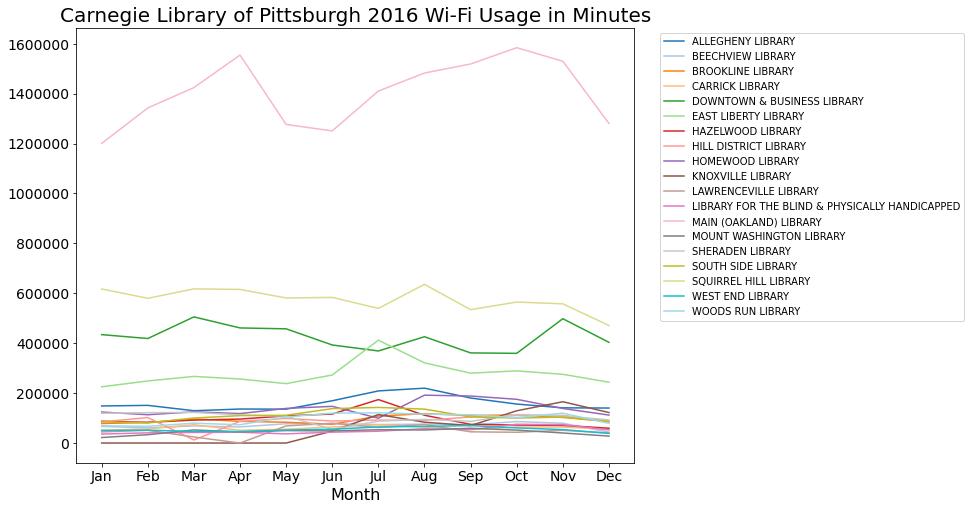

In [96]:
# Select just the 2016 data
wifi_data_2016 = wifi_data[wifi_data['Year'] == 2016].groupby(["Name", "Month"], as_index=False)["WifiMinutes"].sum()

# Reshape the data so it is easier to plot by Month
reshaped_wifi_data_2016 = wifi_data_2016.pivot_table(index="Month", columns="Name", values="WifiMinutes")

# plot the data
ax = reshaped_wifi_data_2016.plot(figsize=(10,8), 
                                  title="Carnegie Library of Pittsburgh 2016 Wi-Fi Usage in Minutes",
                                  colormap="tab20",
                                  fontsize=14)
# clean up the text
ax.xaxis.label.set_size(16)
ax.title.set_size(20)
ax.legend(loc="upper right", bbox_to_anchor=(1.6,1))
ax.ticklabel_format(style="plain")

# add the Month abreviations instead of numbers
ax.set_xticks(ticks=range(1,13),labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul","Aug","Sep","Oct","Nov","Dec"]);


There is a somewhat similar trend at the Main (Oakland) library

TODO: Turn these into activities.

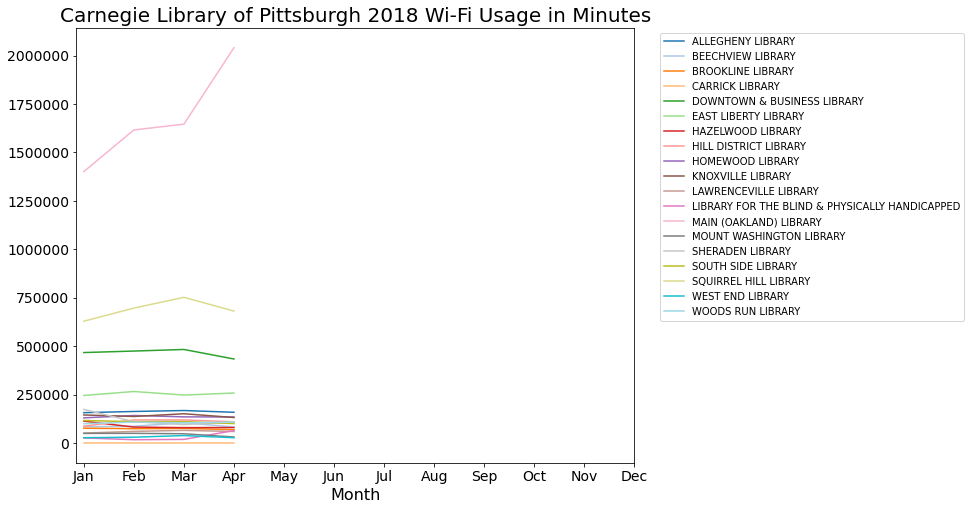

In [99]:
# Select just the 2018 data
wifi_data_2018 = wifi_data[wifi_data['Year'] == 2018].groupby(["Name", "Month"], as_index=False)["WifiMinutes"].sum()

# Reshape the data so it is easier to plot by Month
reshaped_wifi_data_2018 = wifi_data_2018.pivot_table(index="Month", columns="Name", values="WifiMinutes")

# plot the data
ax = reshaped_wifi_data_2018.plot(figsize=(10,8), 
                                  title="Carnegie Library of Pittsburgh 2018 Wi-Fi Usage in Minutes",
                                  colormap="tab20",
                                  fontsize=14)
# clean up the text
ax.xaxis.label.set_size(16)
ax.title.set_size(20)
ax.legend(loc="upper right", bbox_to_anchor=(1.6,1))
ax.ticklabel_format(style="plain")

# add the Month abreviations instead of numbers
ax.set_xticks(ticks=range(1,13),labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul","Aug","Sep","Oct","Nov","Dec"]);


Interesting! It looks like we have incomplete data for 2018. The dataset only includes information up to April.

This is why data visualization is such an important part of exploring and understanding data. It is so much easier to see when the data stops in a chart rather than a table of numbers.

In [100]:
wifi_data.tail()

,CLPID,Name,Year,Month,WifiSessions,WifiMinutes
527,CLP19,WOODS RUN LIBRARY,2017,12,630,79279
528,CLP19,WOODS RUN LIBRARY,2018,1,716,99671
529,CLP19,WOODS RUN LIBRARY,2018,2,778,108100
530,CLP19,WOODS RUN LIBRARY,2018,3,816,104073
531,CLP19,WOODS RUN LIBRARY,2018,4,903,107865


How many months are in the dataset?

In [136]:
wifi_data.groupby("Name").size()

Name
ALLEGHENY LIBRARY                                 28
BEECHVIEW LIBRARY                                 28
BROOKLINE LIBRARY                                 28
CARRICK LIBRARY                                   28
DOWNTOWN & BUSINESS LIBRARY                       28
EAST LIBERTY LIBRARY                              28
HAZELWOOD LIBRARY                                 28
HILL DISTRICT LIBRARY                             28
HOMEWOOD LIBRARY                                  28
KNOXVILLE LIBRARY                                 28
LAWRENCEVILLE LIBRARY                             28
LIBRARY FOR THE BLIND & PHYSICALLY HANDICAPPED    28
MAIN (OAKLAND) LIBRARY                            28
MOUNT WASHINGTON LIBRARY                          28
SHERADEN LIBRARY                                  28
SOUTH SIDE LIBRARY                                28
SQUIRREL HILL LIBRARY                             28
WEST END LIBRARY                                  28
WOODS RUN LIBRARY                        

### Summary of the deep dive into the CLP Wifi Data

In this first section of our data deep dive we spent some time getting familiar with the [CLP Public Wifi dataset](https://data.wprdc.org/dataset/clp-public-wifi) and seeing what we could learn by manipulating just a single dataset.


If we want to answer the question, What neighborhood uses the most public wifi at a CLP location, then we will need more data. The CLP Public Wifi data doesn't include much information about the library locations. 

## Deep Dive into Library Locations

The Public Wifi data includes library names, but doesn't include much information about the locations of the libraries.

If we want to find out the neighborhood wifi usage, we will need to determine the neighborhood within which each library is located. The Public Wifi dataset only includes two pieces of information about the library, the name and the CLPID code. 

The WPRDC also hosts a [Library Locations](https://data.wprdc.org/dataset/libraries/resource/14babf3f-4932-4828-8b49-3c9a03bae6d0?view_id=f34cd02e-17eb-40aa-8f86-ae51968db84a) dataset that includes a bunch of information about each of the libraries in the CLP system.

This dataset has 19 entries for each of the 19 libraries. For each library, we have the following pieces of information:

- CLPID
- Name
- Address
- City
- Zip4
- County
- Phone
- SqFt
- The opening times for each day of the week
- The closing times for each day of the week
- Latitude
- Longitude

Most of the data in this dataset is location information for each of the locations, but it also includes some information about the library iteself, namely how big and when it is open.

In [101]:
# load the library locations dataset into the variable library_data
library_data = pandas.read_csv("clp-library-locations.csv")

In [103]:
# display the first five rows of the library location data
library_data.head()

,CLPID,Name,Address,City,State,Zip4,County,Phone,SqFt,MoOpen,...,ThOpen,ThClose,FrOpen,FrClose,SaOpen,SaClose,SuOpen,SuClose,Lat,Lon
0,CLP01,ALLEGHENY LIBRARY,1230 FEDERAL ST,PITTSBURGH,PA,15212-4704,Allegheny,(412) 237-1890,15005,10:00:00,...,10:00:00,20:00:00,10:00:00,17:00:00,10:00:00,17:00:00,12:00:00,17:00:00,40.456392,-80.006613
1,CLP02,BEECHVIEW LIBRARY,1910 BROADWAY AVE,PITTSBURGH,PA,15216-3130,Allegheny,(412) 563-2900,8000,10:00:00,...,10:00:00,20:00:00,10:00:00,17:00:00,10:00:00,17:00:00,NaN,NaN,40.407026,-80.027741
2,CLP03,BROOKLINE LIBRARY,708 BROOKLINE BLVD,PITTSBURGH,PA,15226-2102,Allegheny,(412) 561-1003,12651,10:00:00,...,10:00:00,20:00:00,10:00:00,17:00:00,10:00:00,17:00:00,NaN,NaN,40.394399,-80.021427
3,CLP04,CARRICK LIBRARY,1811 BROWNSVILLE RD,PITTSBURGH,PA,15210-3907,Allegheny,(412) 882-3897,4000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.397019,-79.987547
4,CLP05,DOWNTOWN & BUSINESS LIBRARY,612 SMITHFIELD ST,PITTSBURGH,PA,15222-2506,Allegheny,(412) 281-7141,12709,08:30:00,...,08:30:00,18:00:00,08:30:00,17:00:00,10:00:00,17:00:00,NaN,NaN,40.441749,-79.997112


One question we can immediately answer from this dataset: What is the biggest CLP library location and how does it compare with other locations?

In [106]:
# Set the index to name and display just the SqFt column in descending order
library_data.set_index("Name")["SqFt"].sort_values(ascending=False)

Name
MAIN (OAKLAND) LIBRARY                            204048
EAST LIBERTY LIBRARY                               40000
LIBRARY FOR THE BLIND & PHYSICALLY HANDICAPPED     34425
HOMEWOOD LIBRARY                                   28776
SQUIRREL HILL LIBRARY                              26706
ALLEGHENY LIBRARY                                  15005
DOWNTOWN & BUSINESS LIBRARY                        12709
BROOKLINE LIBRARY                                  12651
SOUTH SIDE LIBRARY                                 11610
LAWRENCEVILLE LIBRARY                              10345
HILL DISTRICT LIBRARY                               8333
BEECHVIEW LIBRARY                                   8000
HAZELWOOD LIBRARY                                   7000
KNOXVILLE LIBRARY                                   6700
WOODS RUN LIBRARY                                   5745
WEST END LIBRARY                                    5000
MOUNT WASHINGTON LIBRARY                            4915
SHERADEN LIBRARY          

We can see from these results that the Main branch of CLP is the largest, nearly 5 times larger, than the next largest branch in East Liberty. This difference in size probably also helps explain why the main branch has much higher WiFi usage too. 

### Finding out Neighborhoods

Unfortunately, the library location information is missing a vital piece of information we need: neighborhoods!

If we want to obtain neighborhood information for each library, we could spend some time and manually look up it up for each of the 19 locations. But we can also use Python programming to automate the process of looking up each library location and determining the neighborhood. To do this we will use the GPS location of each library location and look it up in a geographic dataset of Pittsburgh's neighborhoods.

## Dive Into Neighborhood Data





### Looking at the Neighborhoods Data

* WPRDC publishes a dataset of Pittsburgh Neighborhoods. 
* [Pittsburgh Neighborhoods](https://data.wprdc.org/dataset/neighborhoods2)
* This is a *geographic* dataset


In [113]:
# load up the necessary libraries
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from numpy import nan

### Loading Data

You need to have a geographic dataset that represents the units of interest. In the current directory is a [geojson](https://en.wikipedia.org/wiki/GeoJSON) file, `neighborhoods.geojson` that encodes all the neighborhoods in Pittsburgh. If you want to data analysis and visualization with neighborhoods, you should copy this file to your workspace.

In [115]:
# read the neighborhood geojson file
pgh_neighborhoods = gpd.read_file("neighborhoods.geojson")

### Quering Geographic Data

Geopandas gives you some geographically aware data structures built on top of the existing Pandas datastructures. This means you can perform a lot of standard Pandas operations on the data, like using query masks (which we will do shortly).

In [116]:
# take a peak at what these data look like
pgh_neighborhoods

,objectid,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,...,page_number,plannerassign,created_user,created_date,last_edited_user,last_edited_date,temp,Shape__Area,Shape__Length,geometry
0,1293,201,42,003,980600,1,420039806001,Block Group 1,G5030,S,...,15,Stephanie Joy Everett,pgh.admin,2020-08-14T14:52:26.924999+00:00,pgh.admin,2020-08-14T14:52:26.924999+00:00,None,1.068796e+07,19600.573085,"POLYGON ((-80.02999 40.45909, -80.02989 40.458..."
1,1294,10,42,003,261200,1,420032612001,Block Group 1,G5030,S,...,15,Stephanie Joy Everett,pgh.admin,2020-08-14T14:52:26.924999+00:00,pgh.admin,2020-08-14T14:52:26.924999+00:00,None,1.133208e+07,21174.473326,"POLYGON ((-80.01078 40.49975, -80.01073 40.499..."
2,1295,11,42,003,260900,1,420032609001,Block Group 1,G5030,S,...,15,Stephanie Joy Everett,pgh.admin,2020-08-14T14:52:26.924999+00:00,pgh.admin,2020-08-14T14:52:26.924999+00:00,None,8.743618e+06,13811.917169,"POLYGON ((-80.00327 40.48271, -80.00325 40.482..."
3,1296,7,42,003,262000,1,420032620001,Block Group 1,G5030,S,...,15,Stephanie Joy Everett,pgh.admin,2020-08-14T14:52:26.924999+00:00,pgh.admin,2020-08-14T14:52:26.924999+00:00,None,1.754935e+07,18197.745741,"POLYGON ((-79.99761 40.47460, -79.99761 40.474..."
4,1297,8,42,003,261500,1,420032615001,Block Group 1,G5030,S,...,15,Stephanie Joy Everett,pgh.admin,2020-08-14T14:52:26.924999+00:00,pgh.admin,2020-08-14T14:52:26.924999+00:00,None,2.522420e+07,26390.549314,"POLYGON ((-80.01422 40.47745, -80.01435 40.477..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,1378,251,42,003,320400,3,420033204003,Block Group 3,G5030,S,...,15,Sophia Robison,pgh.admin,2020-08-14T14:52:26.924999+00:00,pgh.admin,2020-08-14T14:52:26.924999+00:00,None,2.338689e+07,31964.844864,"POLYGON ((-79.99633 40.39458, -79.99630 40.394..."
86,1379,265,42,003,563000,4,420035630004,Block Group 4,G5030,S,...,15,Sophia Robison,pgh.admin,2020-08-14T14:52:26.924999+00:00,pgh.admin,2020-08-14T14:52:26.924999+00:00,None,3.683820e+06,9978.225999,"POLYGON ((-80.06919 40.46046, -80.06912 40.460..."
87,1380,358,42,003,562500,1,420035625001,Block Group 1,G5030,S,...,15,Sophia Robison,pgh.admin,2020-08-14T14:52:26.924999+00:00,pgh.admin,2020-08-14T14:52:26.924999+00:00,None,6.425358e+06,25260.814467,"POLYGON ((-80.05154 40.46364, -80.05140 40.463..."
88,1381,298,42,003,563100,3,420035631003,Block Group 3,G5030,S,...,15,Sophia Robison,pgh.admin,2020-08-14T14:52:26.924999+00:00,pgh.admin,2020-08-14T14:52:26.924999+00:00,None,1.027920e+07,16308.247349,"POLYGON ((-80.03431 40.43366, -80.03424 40.433..."


Geopandas plays nicely with matplotlib so you can make data driven maps quite easily. Here we are making a map of the data and using the [tab20 color map](https://matplotlib.org/stable/tutorials/colors/colormaps.html) to distinguish each neighborhood visually. The colors don't represent any "data" per se, they just represent the individual neighborhoods. You will also notice there is not a distinct color for each neighborhood, that is because the `tab20` color map only has 20 distinct colors and there are 90 neighborhoods in Pittsburgh.

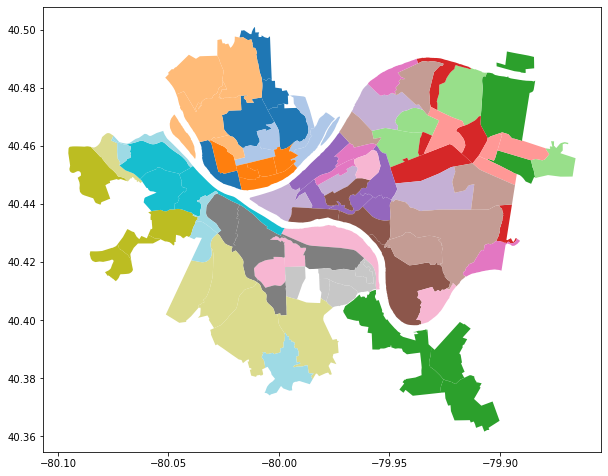

In [117]:
# plot the map using standard pandas plotting functions
pgh_neighborhoods.plot(figsize=(10,10), cmap="tab20"); #add semicolon to prevent ugly output

In [118]:
# what does the first item of the neighborhoods data look like?
pgh_neighborhoods.iloc[0]

objectid                                                         1293
fid_blockg                                                        201
statefp10                                                          42
countyfp10                                                        003
tractce10                                                      980600
blkgrpce10                                                          1
geoid10                                                  420039806001
namelsad10                                              Block Group 1
mtfcc10                                                         G5030
funcstat10                                                          S
aland10                                                        982752
awater10                                                       473795
intptlat10                                                +40.4518148
intptlon10                                               -080.0280506
shape_leng          

The two columns of data we will use are `hood` and `geometry`. The `hood` column contains the name of the neighborhood, the information we want to add to other datasets. The `geometry` column contains a POLYGON, which is basically a geographic shape representing a neighborhood. We can query this shape, that is, ask it if a particular set of GPS coordinates are located within the POLYGON using the [`contains()` function](https://geopandas.org/docs/reference/api/geopandas.GeoSeries.contains.html). This will create a boolean mask (remember those!) that is True or False depending on if the point in question is "contained" by the POLYGON representing that neightborhood.

Let's start by trying to query for a location by hand. If we go to Wikipedia and click on the coordinate for the [Cathedral of Learning](https://en.wikipedia.org/wiki/Cathedral_of_Learning) we can get the specific decimal values for Cathy's location from [this website's entry for the Cathedral of Learning](https://tools.wmflabs.org/geohack/geohack.php?pagename=Cathedral_of_Learning&params=40_26_39_N_79_57_11_W_type:landmark_region:US)

**TODO: introduce Boolean masks or restructure this example a bit**

In [119]:
# copy the lat/long values for Cathy into variables
latitude = 40.444167
longitude = -79.953056

Ok, now we need to introduce a new Python library called [Shapely](https://shapely.readthedocs.io/en/stable/project.html) that can translate GPS coordinates into a shape object that geopandas can understand.

In [120]:
# Now use that to create a Point object
location = Point((longitude, latitude)) # note the double parentheses
print(location)

POINT (-79.953056 40.444167)


In [121]:
# create a query mask using contains() and the Point
location_query = pgh_neighborhoods['geometry'].contains(location)
location_query

0     False
1     False
2     False
3     False
4     False
      ...  
85    False
86    False
87    False
88    False
89    False
Length: 90, dtype: bool

Somewhere in this Pandas Series is a `True`

In [122]:
# use the location_query mask to select only rows with True
pgh_neighborhoods[location_query]

,objectid,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,...,page_number,plannerassign,created_user,created_date,last_edited_user,last_edited_date,temp,Shape__Area,Shape__Length,geometry
37,1330,1,42,003,040400,1,420030404001,Block Group 1,G5030,S,...,15,Derek Dauphin,pgh.admin,2020-08-14T14:52:26.924999+00:00,pgh.admin,2020-08-14T14:52:26.924999+00:00,None,1.390469e+07,20945.56257,"POLYGON ((-79.94969 40.45259, -79.94969 40.452..."


Let's look at all the data for that one row we got back using the index by location method `iloc`.

In [123]:
# display all the data for that one row as a Pandas Series so it is easier to read
pgh_neighborhoods[location_query].iloc[0]

objectid                                                         1330
fid_blockg                                                          1
statefp10                                                          42
countyfp10                                                        003
tractce10                                                      040400
blkgrpce10                                                          1
geoid10                                                  420030404001
namelsad10                                              Block Group 1
mtfcc10                                                         G5030
funcstat10                                                          S
aland10                                                         75472
awater10                                                            0
intptlat10                                                +40.4458408
intptlon10                                               -079.9483932
shape_leng          

In [124]:
# Get the value for the 'hood' column
pgh_neighborhoods[location_query].iloc[0]['hood']

'North Oakland'

So our code says the Cathedral of Learning is located in North Oakland, is that true?
[Google Maps seems to think so](https://goo.gl/maps/U1h3BJdmCem)

Great. So we know it works, now how can we use it on large amounts of data?

### Use Pandas Apply() to process Library GPS locations

Pandas has a lot of handy built-in functions, but it does not include a function that can perform the geographic query we demonstrated above. Instead, what we need to do is use a special dataframe function, `apply()` that allows us to create our own custom function that will be *applied* to every row of the data. Apply is kinda like using a `for` loop over every row of your dataframe, but it operates a bit faster. 

We need to create a python function that does the following:
* Take a row as an input parameter
* Convert the latitude and longitude columns of that row to a single "Point" object
* Perform a lookup in the pgh_neighborhoods data to see if that Point/Tree exists 
* Return the name of the neighborhood if it exists or return `NaN`

The function should be written as if it were inside a for loop that iterated over each row of the data, but `apply()` will handle all the looping by calling our function repeatedly and pass each row as a parameter to the function. This is preferable to looping looping over the datafarme in vanilla python because Pandas. 

What `apply()` will then return is a new Series of neighborhood names derived from the geolocation code. Then we can compare this list of neighborhoods with the actual neighborhood values in the tree data to see if it worked properly.

In [126]:
# create a function that we will supply to apply
def reverse_geolocate_neighborhood(row):
    """Given a row, grab the latitude and longitude columns and 
    return the neighborhood name (or nan for locations outside the dataset)."""
    
    # get the latitude and longitude 
    latitude = float(row['Lat'])
    longitude = float(row['Lon'])
    
    # create a shapely point from the GPS coordinates
    location = Point(longitude, latitude)
    
    # make a query mask and query the data on that location
    location_query = pgh_neighborhoods['geometry'].contains(location)
    result = pgh_neighborhoods[location_query]
    
    # if the location isn't in dataset it will be empty
    if result.empty:
        # location isn't within Pittsburgh, return not-a-number
        return nan
    else:
        # return a string of the "hood" where the point was located
        return result.iloc[0]['hood']

Now we can give our `reverse_goelocate_neighborhood` function as a parameter to the [dataframe apply](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html) function and Pandas process every row of the data using our custom function. This will create a new Pandas series with all the neighborhood names.

![Yo dawg meme](https://memegenerator.net/img/instances/65870158/yo-dawg-i-heard-you-like-functions-so-i-put-a-function-in-your-function.jpg)

**THIS CELL WILL TAKE A LONG TIME TO RUN BECAUSE IT IS CRUNCHING ALL THE DATA**

In [130]:
# perform reverse geocoding with every row in the library data
# save results as a new column in our tree dataframe
library_data['neighborhood'] = library_data.apply(reverse_geolocate_neighborhood, axis=1)

# display the update librar data
library_data

,CLPID,Name,Address,City,State,Zip4,County,Phone,SqFt,MoOpen,...,ThClose,FrOpen,FrClose,SaOpen,SaClose,SuOpen,SuClose,Lat,Lon,neighborhood
0,CLP01,ALLEGHENY LIBRARY,1230 FEDERAL ST,PITTSBURGH,PA,15212-4704,Allegheny,(412) 237-1890,15005,10:00:00,...,20:00:00,10:00:00,17:00:00,10:00:00,17:00:00,12:00:00,17:00:00,40.456392,-80.006613,Central Northside
1,CLP02,BEECHVIEW LIBRARY,1910 BROADWAY AVE,PITTSBURGH,PA,15216-3130,Allegheny,(412) 563-2900,8000,10:00:00,...,20:00:00,10:00:00,17:00:00,10:00:00,17:00:00,NaN,NaN,40.407026,-80.027741,Beechview
2,CLP03,BROOKLINE LIBRARY,708 BROOKLINE BLVD,PITTSBURGH,PA,15226-2102,Allegheny,(412) 561-1003,12651,10:00:00,...,20:00:00,10:00:00,17:00:00,10:00:00,17:00:00,NaN,NaN,40.394399,-80.021427,Brookline
3,CLP04,CARRICK LIBRARY,1811 BROWNSVILLE RD,PITTSBURGH,PA,15210-3907,Allegheny,(412) 882-3897,4000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.397019,-79.987547,Carrick
4,CLP05,DOWNTOWN & BUSINESS LIBRARY,612 SMITHFIELD ST,PITTSBURGH,PA,15222-2506,Allegheny,(412) 281-7141,12709,08:30:00,...,18:00:00,08:30:00,17:00:00,10:00:00,17:00:00,NaN,NaN,40.441749,-79.997112,Central Business District
5,CLP06,EAST LIBERTY LIBRARY,130 SOUTH WHITFIELD ST,PITTSBURGH,PA,15206-3806,Allegheny,(412) 363-8232,40000,10:00:00,...,20:00:00,10:00:00,17:00:00,10:00:00,17:00:00,NaN,NaN,40.460963,-79.926502,East Liberty
6,CLP07,HAZELWOOD LIBRARY,5006 SECOND AVE,PITTSBURGH,PA,15207-1625,Allegheny,(412) 421-2517,7000,10:00:00,...,20:00:00,10:00:00,17:00:00,10:00:00,17:00:00,NaN,NaN,40.409805,-79.943849,Hazelwood
7,CLP08,HILL DISTRICT LIBRARY,2177 CENTRE AVE,PITTSBURGH,PA,15219-6316,Allegheny,(412) 281-3753,8333,10:00:00,...,17:00:00,10:00:00,17:00:00,10:00:00,17:00:00,NaN,NaN,40.445471,-79.976706,Middle Hill
8,CLP09,HOMEWOOD LIBRARY,7101 HAMILTON AVE,PITTSBURGH,PA,15208-2847,Allegheny,(412) 731-3080,28776,10:00:00,...,20:00:00,10:00:00,17:00:00,10:00:00,17:00:00,NaN,NaN,40.455284,-79.899213,Homewood South
9,CLP10,KNOXVILLE LIBRARY,400 BROWNSVILLE RD,PITTSBURGH,PA,15210-2251,Allegheny,(412) 381-6543,6700,10:00:00,...,17:00:00,10:00:00,17:00:00,10:00:00,17:00:00,NaN,NaN,40.413186,-79.989149,Knoxville


Neat! Now we have added a neighborhood column to the Library Locations dataset.

In [131]:
# select just the name and neighborhood columns from the library data
library_data[["Name", "neighborhood"]]

,Name,neighborhood
0,ALLEGHENY LIBRARY,Central Northside
1,BEECHVIEW LIBRARY,Beechview
2,BROOKLINE LIBRARY,Brookline
3,CARRICK LIBRARY,Carrick
4,DOWNTOWN & BUSINESS LIBRARY,Central Business District
5,EAST LIBERTY LIBRARY,East Liberty
6,HAZELWOOD LIBRARY,Hazelwood
7,HILL DISTRICT LIBRARY,Middle Hill
8,HOMEWOOD LIBRARY,Homewood South
9,KNOXVILLE LIBRARY,Knoxville


Now that we have added neighborhood information to our library location data, now what we need to do is connect the library location data with the public wifi data.

## Joining the Library Locations and Public Wifi Data

We now have all of the information we need to answer the question, what neighborhood uses the most Wifi in Pittsburgh. However, the data we need to answer this question is in two separate datasets. What we need to do is *join* the data together.

In [135]:
# look at the public wifi data
wifi_data.head(2)

,CLPID,Name,Year,Month,WifiSessions,WifiMinutes
0,CLP01,ALLEGHENY LIBRARY,2016,1,1037,148513
1,CLP01,ALLEGHENY LIBRARY,2016,2,1064,150948


In [134]:
# look at the library data
library_data.head(2)

,CLPID,Name,Address,City,State,Zip4,County,Phone,SqFt,MoOpen,...,ThClose,FrOpen,FrClose,SaOpen,SaClose,SuOpen,SuClose,Lat,Lon,neighborhood
0,CLP01,ALLEGHENY LIBRARY,1230 FEDERAL ST,PITTSBURGH,PA,15212-4704,Allegheny,(412) 237-1890,15005,10:00:00,...,20:00:00,10:00:00,17:00:00,10:00:00,17:00:00,12:00:00,17:00:00,40.456392,-80.006613,Central Northside
1,CLP02,BEECHVIEW LIBRARY,1910 BROADWAY AVE,PITTSBURGH,PA,15216-3130,Allegheny,(412) 563-2900,8000,10:00:00,...,20:00:00,10:00:00,17:00:00,10:00:00,17:00:00,NaN,NaN,40.407026,-80.027741,Beechview


When joining together two separate datasets, you need to consider several factors. First, are there any shared columns, that is, are there data that are the same in both datasets. For the Wifi and Library locations data we can see there are two shared columns: `CLPID` and `Name`. The data values in both of these columns are exactly the same which means we can match rows from one dataset with rows from another dataset by joining on the data values in these columns. However, there is another important factor to consider when joining data together. What is the relationship between the entity each row represents in the datasets. 

- one to one : Rows in both datasets represent the same thing
- Many to one (or one to many): Entities in one dataset correspond to only one row in the other dataset.
- Many to Many: Multiple rows in one dataset correspond to multiple rows in the other dataset. 


In our case, we have a many to one relationship between the wifi data and the library locations data. Each row in the public wifi data corresponds to the amount of wifi usage at a particular library location in a particular month. Given that the dataset spans from January of 2016 to April of 2018, 28 months, that means there are 28 rows in the public wifi data that correspond to 1 row in the library locations data.

**TODO: Explain GroupBy. What is the problem we are having and why does Groupby solve that problem**

In [139]:
# create new dataset of total wifi usage per library
wifi_data_per_library = wifi_data.groupby("Name",as_index=False)[["WifiSessions", "WifiMinutes"]].sum()
wifi_data_per_library

,Name,WifiSessions,WifiMinutes
0,ALLEGHENY LIBRARY,40010,4401158
1,BEECHVIEW LIBRARY,17319,2349743
2,BROOKLINE LIBRARY,18266,2461372
3,CARRICK LIBRARY,6430,987890
4,DOWNTOWN & BUSINESS LIBRARY,100802,11912027
5,EAST LIBERTY LIBRARY,60562,7372306
6,HAZELWOOD LIBRARY,18804,2435891
7,HILL DISTRICT LIBRARY,24522,2893996
8,HOMEWOOD LIBRARY,29618,3960604
9,KNOXVILLE LIBRARY,26174,3356824


In [142]:
# join together the library data with the public wifi data
wifi_per_neighborhood = pandas.merge(wifi_data_per_library, library_data[["Name","neighborhood"]])
wifi_per_neighborhood

,Name,WifiSessions,WifiMinutes,neighborhood
0,ALLEGHENY LIBRARY,40010,4401158,Central Northside
1,BEECHVIEW LIBRARY,17319,2349743,Beechview
2,BROOKLINE LIBRARY,18266,2461372,Brookline
3,CARRICK LIBRARY,6430,987890,Carrick
4,DOWNTOWN & BUSINESS LIBRARY,100802,11912027,Central Business District
5,EAST LIBERTY LIBRARY,60562,7372306,East Liberty
6,HAZELWOOD LIBRARY,18804,2435891,Hazelwood
7,HILL DISTRICT LIBRARY,24522,2893996,Middle Hill
8,HOMEWOOD LIBRARY,29618,3960604,Homewood South
9,KNOXVILLE LIBRARY,26174,3356824,Knoxville


In [144]:
# sort data by WifiMinutes
wifi_per_neighborhood.sort_values("WifiMinutes", ascending=False)

,Name,WifiSessions,WifiMinutes,neighborhood
12,MAIN (OAKLAND) LIBRARY,296258,40557804,North Oakland
16,SQUIRREL HILL LIBRARY,121232,16436638,Squirrel Hill North
4,DOWNTOWN & BUSINESS LIBRARY,100802,11912027,Central Business District
5,EAST LIBERTY LIBRARY,60562,7372306,East Liberty
0,ALLEGHENY LIBRARY,40010,4401158,Central Northside
8,HOMEWOOD LIBRARY,29618,3960604,Homewood South
14,SHERADEN LIBRARY,23757,3525389,Sheraden
9,KNOXVILLE LIBRARY,26174,3356824,Knoxville
18,WOODS RUN LIBRARY,23103,3262051,Marshall-Shadeland
15,SOUTH SIDE LIBRARY,20840,2928382,South Side Flats


### Make a Map

> NOTE: Remove this map example.

We can use the neighborhood geographic data to create a choropleth map that visualizes wifi usage per neighborhood

In [150]:
# join the wifi data to the neighborhood geographic data
wifi_geo_data = pgh_neighborhoods.merge(wifi_per_neighborhood, left_on="hood", right_on="neighborhood", how="left")
wifi_geo_data.head()

,objectid,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,...,last_edited_user,last_edited_date,temp,Shape__Area,Shape__Length,geometry,Name,WifiSessions,WifiMinutes,neighborhood
0,1293,201,42,003,980600,1,420039806001,Block Group 1,G5030,S,...,pgh.admin,2020-08-14T14:52:26.924999+00:00,None,1.068796e+07,19600.573085,"POLYGON ((-80.02999 40.45909, -80.02989 40.458...",NaN,NaN,NaN,NaN
1,1294,10,42,003,261200,1,420032612001,Block Group 1,G5030,S,...,pgh.admin,2020-08-14T14:52:26.924999+00:00,None,1.133208e+07,21174.473326,"POLYGON ((-80.01078 40.49975, -80.01073 40.499...",NaN,NaN,NaN,NaN
2,1295,11,42,003,260900,1,420032609001,Block Group 1,G5030,S,...,pgh.admin,2020-08-14T14:52:26.924999+00:00,None,8.743618e+06,13811.917169,"POLYGON ((-80.00327 40.48271, -80.00325 40.482...",NaN,NaN,NaN,NaN
3,1296,7,42,003,262000,1,420032620001,Block Group 1,G5030,S,...,pgh.admin,2020-08-14T14:52:26.924999+00:00,None,1.754935e+07,18197.745741,"POLYGON ((-79.99761 40.47460, -79.99761 40.474...",NaN,NaN,NaN,NaN
4,1297,8,42,003,261500,1,420032615001,Block Group 1,G5030,S,...,pgh.admin,2020-08-14T14:52:26.924999+00:00,None,2.522420e+07,26390.549314,"POLYGON ((-80.01422 40.47745, -80.01435 40.477...",NaN,NaN,NaN,NaN


In [ ]:
# fill the missing da

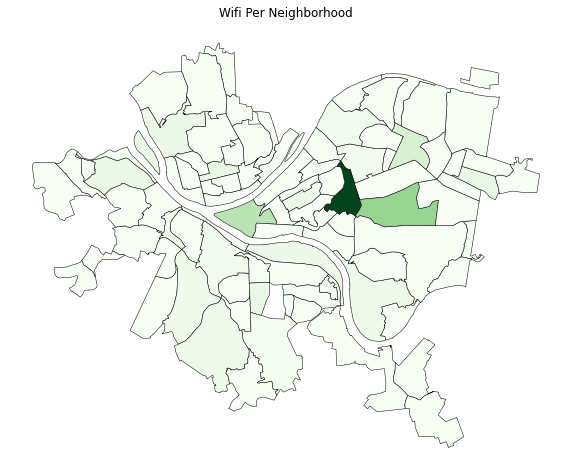

In [159]:
ax = wifi_geo_data.fillna(0).plot(column="WifiMinutes",
                        figsize=(10,10),
                        #legend=True,
                        linewidth=0.5,
                        edgecolor="black",
                        cmap="Greens")
ax.set_title("Wifi Per Neighborhood")
ax.axis("off");

In [167]:
wifi_geo_data.explore("WifiMinutes", legend=False, cmap="Blues", tooltip=["Name", "WifiMinutes", "WifiSessions", "hood"])